# Bayesian Network - pgmpy library package 

Problem:
Objective: 

In [62]:
import pandas as pd 
import seaborn as sns
import numpy as np 

In [2]:
df= pd.read_csv("pen_parametric_LPQ.csv")

In [3]:
df.head()

,pen_id,param_ky,part_ts,reclaim_ct,vchar_param_vl,int_param_vl,dbl_param_vl,param_nm,param_dn,datatag_cd,...,equip_type_ky,equip_type_nm,process_ky,process_nm,last_reclaim_fg,source_db_insert_ts,db_data_source_cd,insert_ts,update_ts,sort_key_dt
0,6671555000708336,44201,2023-07-05 11:32:18.000,1,NaN,NaN,2.541982,[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht],FoamHeight,F_Ht,...,13718,TIJ2X R1 22 FOAM MONO,2443,FOAM INSERT MONO,Y,2023-07-05 11:32:26.040,MAGMA5,2023-07-05 14:13:56.456,2023-07-05 14:13:56.456,2023-07-05
1,6671555000708336,44306,2023-07-05 11:34:44.000,1,NaN,2322.0,NaN,[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWPMax],Power,R_HWPMax,...,13727,TIJ2X R1 22 LID WELD LONG,313,Lid,Y,2023-07-05 11:34:56.240,MAGMA5,2023-07-05 14:13:56.456,2023-07-05 14:13:56.456,2023-07-05
2,6671555000708336,44307,2023-07-05 11:34:44.000,1,NaN,76.0,NaN,[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWAmpl],Amplitude,R_HWAmpl,...,13727,TIJ2X R1 22 LID WELD LONG,313,Lid,Y,2023-07-05 11:34:56.240,MAGMA5,2023-07-05 14:13:56.456,2023-07-05 14:13:56.456,2023-07-05
3,6671555000708336,44305,2023-07-05 11:34:44.000,1,NaN,NaN,0.135000,[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWWeldTm],Welding Time,R_HWWeldTm,...,13727,TIJ2X R1 22 LID WELD LONG,313,Lid,Y,2023-07-05 11:34:56.240,MAGMA5,2023-07-05 14:13:56.456,2023-07-05 14:13:56.456,2023-07-05
4,6671555000708336,44308,2023-07-05 11:34:44.000,1,NaN,162.0,NaN,[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWEnergy],Energy,R_HWEnergy,...,13727,TIJ2X R1 22 LID WELD LONG,313,Lid,Y,2023-07-05 11:34:56.257,MAGMA5,2023-07-05 14:13:56.456,2023-07-05 14:13:56.456,2023-07-05


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13981 entries, 0 to 13980
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pen_id               13981 non-null  int64  
 1   param_ky             13981 non-null  int64  
 2   part_ts              13981 non-null  object 
 3   reclaim_ct           13981 non-null  int64  
 4   vchar_param_vl       306 non-null    object 
 5   int_param_vl         10534 non-null  float64
 6   dbl_param_vl         3135 non-null   float64
 7   param_nm             13981 non-null  object 
 8   param_dn             13981 non-null  object 
 9   datatag_cd           13981 non-null  object 
 10  datatype_cd          13981 non-null  object 
 11  equip_ky             13981 non-null  int64  
 12  equip_nm             13981 non-null  object 
 13  line_nm              13981 non-null  object 
 14  equip_type_ky        13981 non-null  int64  
 15  equip_type_nm        13981 non-null 

# Data Pre-processing

In [5]:
df.fillna(0, inplace= True)

In [6]:
df['dbl_param_vl'] = df['int_param_vl'] + df['dbl_param_vl'].apply(lambda x: round(x,3))
df['dbl_param_vl'] = df['dbl_param_vl'].astype(str) + df['vchar_param_vl'].astype(str)

In [7]:
df.head()

,pen_id,param_ky,part_ts,reclaim_ct,vchar_param_vl,int_param_vl,dbl_param_vl,param_nm,param_dn,datatag_cd,...,equip_type_ky,equip_type_nm,process_ky,process_nm,last_reclaim_fg,source_db_insert_ts,db_data_source_cd,insert_ts,update_ts,sort_key_dt
0,6671555000708336,44201,2023-07-05 11:32:18.000,1,0,0.0,2.5420,[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht],FoamHeight,F_Ht,...,13718,TIJ2X R1 22 FOAM MONO,2443,FOAM INSERT MONO,Y,2023-07-05 11:32:26.040,MAGMA5,2023-07-05 14:13:56.456,2023-07-05 14:13:56.456,2023-07-05
1,6671555000708336,44306,2023-07-05 11:34:44.000,1,0,2322.0,2322.00,[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWPMax],Power,R_HWPMax,...,13727,TIJ2X R1 22 LID WELD LONG,313,Lid,Y,2023-07-05 11:34:56.240,MAGMA5,2023-07-05 14:13:56.456,2023-07-05 14:13:56.456,2023-07-05
2,6671555000708336,44307,2023-07-05 11:34:44.000,1,0,76.0,76.00,[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWAmpl],Amplitude,R_HWAmpl,...,13727,TIJ2X R1 22 LID WELD LONG,313,Lid,Y,2023-07-05 11:34:56.240,MAGMA5,2023-07-05 14:13:56.456,2023-07-05 14:13:56.456,2023-07-05
3,6671555000708336,44305,2023-07-05 11:34:44.000,1,0,0.0,0.1350,[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWWeldTm],Welding Time,R_HWWeldTm,...,13727,TIJ2X R1 22 LID WELD LONG,313,Lid,Y,2023-07-05 11:34:56.240,MAGMA5,2023-07-05 14:13:56.456,2023-07-05 14:13:56.456,2023-07-05
4,6671555000708336,44308,2023-07-05 11:34:44.000,1,0,162.0,162.00,[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWEnergy],Energy,R_HWEnergy,...,13727,TIJ2X R1 22 LID WELD LONG,313,Lid,Y,2023-07-05 11:34:56.257,MAGMA5,2023-07-05 14:13:56.456,2023-07-05 14:13:56.456,2023-07-05


In [8]:
unique_lists_1 = df['param_nm'].unique().tolist()

In [9]:
unique_lists_2 = df['process_nm'].unique().tolist()

In [10]:
unique_lists_1

['[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht]',
 '[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWPMax]',
 '[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWAmpl]',
 '[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWWeldTm]',
 '[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWEnergy]',
 '[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWDepth]',
 '[Filter]-[TIJ2X R1 22 FILTER MONO]-[TStkTemp]',
 '[Filter]-[TIJ2X R1 22 FILTER MONO]-[TStkForce]',
 '[Filter]-[TIJ2X R1 22 FILTER MONO]-[TStkTime]',
 '[IHA ADHESIVE CURE]-[TIJ2X R1 22 IHA CURE PALLETS]-[nozzle_ID]',
 '[IHA ADHESIVE CURE]-[TIJ2X R1 22 IHA CURE PALLETS]-[Heat_bank]',
 '[IHA ADHESIVE CURE]-[TIJ2X R1 22 IHA CURE PALLETS]-[Heat_Temp]',
 '[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[FW903Z]',
 '[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[FW906X]',
 '[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZInspRes]',
 '[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZInspFail]',
 '[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZD1AvgHt]',
 '

In [27]:
unique_lists_2

['FOAM INSERT MONO',
 'Lid',
 'Filter',
 'IHA ADHESIVE CURE',
 'IHA FLEX INSPECT TEST',
 'ADHESIVE DISPENSE',
 'SMART BASE IHA ATTACH',
 'WET PEN ETEST',
 'Ink Fill',
 'Image Quality Test',
 'Tape',
 'INK WEIGHT CPM',
 'Bubble Test']

In [28]:
df.to_csv('pen_parametric_LPQ_processed.csv',index= True)

Data Pre-processing 

In [29]:
transposed_df = df.pivot_table(index='pen_id',columns='param_nm',values='dbl_param_vl', aggfunc='first')

In [30]:
transposed_df

param_nm,[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[CycleTime],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Disp_RT],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[DspPattern],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Last_WT],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Pressure],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[StartDly],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[WT_Time],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[CycleTime],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Disp_RT],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[DspPattern],...,[Tape]-[TIJ2X R1 22 TAPE INSPECT]-[Tentline2Y],[Tape]-[TIJ2X R1 22 TAPE INSPECT]-[YMBlobNoz],[Tape]-[TIJ2X R1 22 TAPE INSPECT]-[YMBlobNtw],[Tape]-[TIJ2X R1 22 TAPE INSPECT]-[YMBlobStw],[WET PEN ETEST]-[TIJ2X R1 22 ETEST A]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST B]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST C]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST D]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST E]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST E]-[UID]
pen_id,,,,,,,,,,,,,,,,,,,,,
6671555000708058,2366.00,0.0060,8.00,0.0560,45.00,0.00,15.00,3361.00,0.0060,7.00,...,0.00,0.00,0.00,0.00,577.00,8513.00,17.00,235.00,23877.00,0.0196457136B783E
6671555000708081,2367.00,0.0060,8.00,0.0560,44.90,0.00,15.00,3352.00,0.0060,7.00,...,0.00,0.00,0.00,0.00,577.00,8513.00,17.00,235.00,23877.00,0.01CDB6A4AB31B8D
6671555000708084,2330.00,0.0040,8.00,0.0590,41.90,0.00,15.00,3370.00,0.0050,7.00,...,0.00,0.00,0.00,0.00,577.00,8513.00,17.00,235.00,23877.00,0.039A4DED16A6E82
6671555000708095,2365.00,0.0060,8.00,0.0560,45.00,0.00,15.00,3355.00,0.0060,7.00,...,0.00,0.00,0.00,0.00,577.00,8513.00,17.00,235.00,23877.00,0.019293A5D9C87C8
6671555000708097,2367.00,0.0060,8.00,0.0560,45.00,0.00,15.00,3367.00,0.0060,7.00,...,0.00,0.00,0.00,0.00,577.00,8513.00,17.00,235.00,23877.00,0.02F79FB422D0C57
6671555000708116,2358.00,0.0060,8.00,0.0560,44.90,0.00,15.00,3368.00,0.0060,7.00,...,0.00,0.00,0.00,0.00,577.00,8513.00,17.00,235.00,23877.00,0.037CFD342C1FCEF
6671555000708132,2363.00,0.0060,8.00,0.0560,45.00,0.00,15.00,3367.00,0.0060,7.00,...,0.00,0.00,0.00,0.00,577.00,8513.00,17.00,235.00,23877.00,0.0093ABACE1DBC3F
6671555000708149,2323.00,0.0040,8.00,0.0590,42.00,0.00,15.00,3367.00,0.0050,7.00,...,0.00,0.00,0.00,0.00,577.00,8513.00,17.00,235.00,23877.00,0.03767693405C5E1
6671555000708157,2049.00,0.0060,8.00,0.10,52.00,30.00,15.00,3073.00,0.0060,7.00,...,0.00,0.00,0.00,0.00,577.00,8513.00,17.00,235.00,23877.00,0.031D5F55864FAEC


In [31]:
transposed_df.to_csv('transposed_LPQ.csv')

In [32]:
df_transposed = pd.read_csv('transposed_LPQ.csv')

In [33]:
df_transposed

,pen_id,[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[CycleTime],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Disp_RT],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[DspPattern],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Last_WT],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Pressure],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[StartDly],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[WT_Time],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[CycleTime],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Disp_RT],...,[Tape]-[TIJ2X R1 22 TAPE INSPECT]-[Tentline2Y],[Tape]-[TIJ2X R1 22 TAPE INSPECT]-[YMBlobNoz],[Tape]-[TIJ2X R1 22 TAPE INSPECT]-[YMBlobNtw],[Tape]-[TIJ2X R1 22 TAPE INSPECT]-[YMBlobStw],[WET PEN ETEST]-[TIJ2X R1 22 ETEST A]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST B]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST C]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST D]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST E]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST E]-[UID]
0,6671555000708058,2366.0,0.006,8.0,0.056,45.0,0.0,15.0,3361.0,0.006,...,0.0,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.0196457136B783E
1,6671555000708081,2367.0,0.006,8.0,0.056,44.9,0.0,15.0,3352.0,0.006,...,0.0,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.01CDB6A4AB31B8D
2,6671555000708084,2330.0,0.004,8.0,0.059,41.9,0.0,15.0,3370.0,0.005,...,0.0,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.039A4DED16A6E82
3,6671555000708095,2365.0,0.006,8.0,0.056,45.0,0.0,15.0,3355.0,0.006,...,0.0,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.019293A5D9C87C8
4,6671555000708097,2367.0,0.006,8.0,0.056,45.0,0.0,15.0,3367.0,0.006,...,0.0,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.02F79FB422D0C57
5,6671555000708116,2358.0,0.006,8.0,0.056,44.9,0.0,15.0,3368.0,0.006,...,0.0,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.037CFD342C1FCEF
6,6671555000708132,2363.0,0.006,8.0,0.056,45.0,0.0,15.0,3367.0,0.006,...,0.0,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.0093ABACE1DBC3F
7,6671555000708149,2323.0,0.004,8.0,0.059,42.0,0.0,15.0,3367.0,0.005,...,0.0,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.03767693405C5E1
8,6671555000708157,2049.0,0.006,8.0,0.100,52.0,30.0,15.0,3073.0,0.006,...,0.0,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.031D5F55864FAEC
9,6671555000708162,2369.0,0.006,8.0,0.056,44.9,0.0,15.0,3366.0,0.006,...,0.0,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.03C2A1DD51048FD


In [34]:
df_transposed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 347 entries, pen_id to [WET PEN ETEST]-[TIJ2X R1 22 ETEST E]-[UID]
dtypes: float64(335), int64(1), object(11)
memory usage: 114.0+ KB


In [35]:
df_CPM = pd.read_csv('LPQ_CPM.csv')

In [36]:
df_CPM

,pen_id,Status
0,6671555000708241,Deprime
1,6671555000708191,Pass
2,6671555000708058,Pass
3,6671555000708116,Pass
4,6671555000708095,Pass
5,6671555000708202,Pass
6,6671555000708324,Pass
7,6671555000708306,Pass
8,6671555000708260,Pass
9,6671555000708305,Pass


In [47]:
df_merged = pd.merge(df_transposed, df_CPM, on='pen_id', how ='inner')

In [48]:
df_merged

,pen_id,[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[CycleTime],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Disp_RT],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[DspPattern],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Last_WT],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Pressure],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[StartDly],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[WT_Time],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[CycleTime],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Disp_RT],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[DspPattern],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Last_WT],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Pressure],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[StartDly],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[WT_Time],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1CoGX],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1CoGY],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1Fail],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1Vol],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB2AvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB2AvgWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB2CoGX],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB2CoGY],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB2MaxHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB2MaxWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB2MinHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB2MinWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB2Vol],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB3AvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB3AvgWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB3CoGX],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB3CoGY],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB3MaxHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB3MaxWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB3MinHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB3MinWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB3Vol],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FS1AvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FS1AvgWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FS1CoGX],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FS1CoGY],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FS1Vol],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FS2AvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FS2AvgWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FS2CoGX],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FS2CoGY],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FS2Vol],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FSFail],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[InspFail],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[InspResult],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI1AvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI1AvgWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI1CoGX],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI1CoGY],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI1Vol],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI2AvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI2AvgWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI2CoGX],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI2CoGY],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI2Vol],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI3AvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI3AvgWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI3CoGX],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI3CoGY],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[MI3Vol],[ADHESI

In [49]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(df_merged.isnull().sum())

pen_id                                                                    0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[CycleTime]               0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Disp_RT]                 0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[DspPattern]              0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Last_WT]                 0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Pressure]                0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[StartDly]                0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[WT_Time]                 0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[CycleTime]               0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Disp_RT]                 0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[DspPattern]              0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Last_WT]                 0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Pressure]                0
[ADHESIVE DI

In [50]:
display(df_merged.nunique())

pen_id                                                                   42
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[CycleTime]              33
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Disp_RT]                 3
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[DspPattern]              1
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Last_WT]                 3
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Pressure]                6
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[StartDly]                3
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[WT_Time]                 1
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[CycleTime]              37
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Disp_RT]                 3
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[DspPattern]              1
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Last_WT]                 4
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Pressure]                7
[ADHESIVE DI

- Remove rows with missing value 
- Remove nunique <=3, doesn't provide any valuable insight  

Critical parameter Z1 - missing data filter staking 
[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht] 


Critical parameter Z2
[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt]
[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMAvgHt]
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1Vol]
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgHt]
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgWi]


Critical parameter Z3
[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt] 
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas] 
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]

In [51]:
columns_to_include = [
    "[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht]",
    "[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt]",
    "[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMAvgHt]",
    "[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1Vol]",
    "[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgHt]",
    "[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgWi]",
    "[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt]",
    "[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas]",
    "[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]",
    "[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]",
    "Status"
]

df_selected = df_merged[columns_to_include]

In [52]:
df_selected = df_selected.dropna(axis=1)

In [53]:
unique_counts = df_selected.drop('Status',axis=1).nunique()

columns_to_drop = unique_counts[unique_counts <=3].index.tolist()
if 'Status' in columns_to_drop:
    columns_to_drop.remove('Status')

df_merged_filtered = df_selected.drop(columns=columns_to_drop)

In [54]:
df_merged_filtered

,[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht],[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt],[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMAvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1Vol],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgWi],[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP],Status
0,2.527,2220.0,2261.0,7619.0,554.0,920.0,61.62,2.462,1.886,3.980,Pass
1,2.762,2255.0,2290.0,7018.0,527.0,892.0,61.80,2.574,1.899,4.077,Pass
2,1.883,2239.0,2277.0,8524.0,594.0,961.0,61.76,2.487,1.896,4.050,Pass
3,2.435,2232.0,2277.0,8257.0,573.0,965.0,61.78,2.512,1.867,4.003,Pass
4,2.334,2235.0,2289.0,7985.0,557.0,943.0,61.65,2.537,1.880,4.200,Pass
5,2.577,2252.0,2281.0,7414.0,542.0,912.0,61.76,2.477,1.855,4.050,Pass
6,3.058,2240.0,2286.0,7242.0,543.0,885.0,61.54,2.515,1.871,4.077,Pass
7,2.510,2233.0,2278.0,8365.0,584.0,963.0,61.85,2.477,1.855,4.032,Pass
8,2.674,2264.0,2310.0,7678.0,571.0,943.0,61.83,2.531,1.883,3.997,Pass
9,2.724,2265.0,2295.0,7456.0,547.0,910.0,61.91,2.515,1.849,4.043,Pass


In [55]:
df_merged_filtered.nunique()

[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht]                    42
[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt]      35
[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMAvgHt]    33
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1Vol]               42
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgHt]             29
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgWi]             32
[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt]            29
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas]                        31
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]                        28
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]                        39
Status                                                                2
dtype: int64

In [56]:
keywords_to_remove = ['TAPE', 'SMART', 'ETEST','FLEX','pen_ID','VENT','Image']

# Get columns containing any of the keywords
columns_to_drop = df_merged_filtered.columns[df_merged_filtered.columns.str.contains('|'.join(keywords_to_remove), case=False)]

# Drop the selected columns from the DataFrame
df_featured = df_merged_filtered.drop(columns=columns_to_drop)

df_featured_reset = df_featured.reset_index(drop=True)
# Display the updated DataFrame
print(df_featured_reset)


    [Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht]  \
0                                               2.527   
1                                               2.762   
2                                               1.883   
3                                               2.435   
4                                               2.334   
5                                               2.577   
6                                               3.058   
7                                               2.510   
8                                               2.674   
9                                               2.724   
10                                              1.808   
11                                              2.349   
12                                              2.569   
13                                              2.381   
14                                              2.289   
15                                              2.389   
16                             

- Feature importance - foam, filter, adhesive, ink fill, ink weight 

- Foam height 
- Filter - unknown - filter bubble test + input parameter 
- Adhesive dispense - fluidic beads (inkfeed slot) 
- Vision inspect - POM Z height after the IHA attached 
- Inkfill - vacuum delta
- Ink weight - CPM 

In [59]:
df_featured_reset.to_csv('feature_selected.csv')

# Exploratory Data Analysis (EDA)

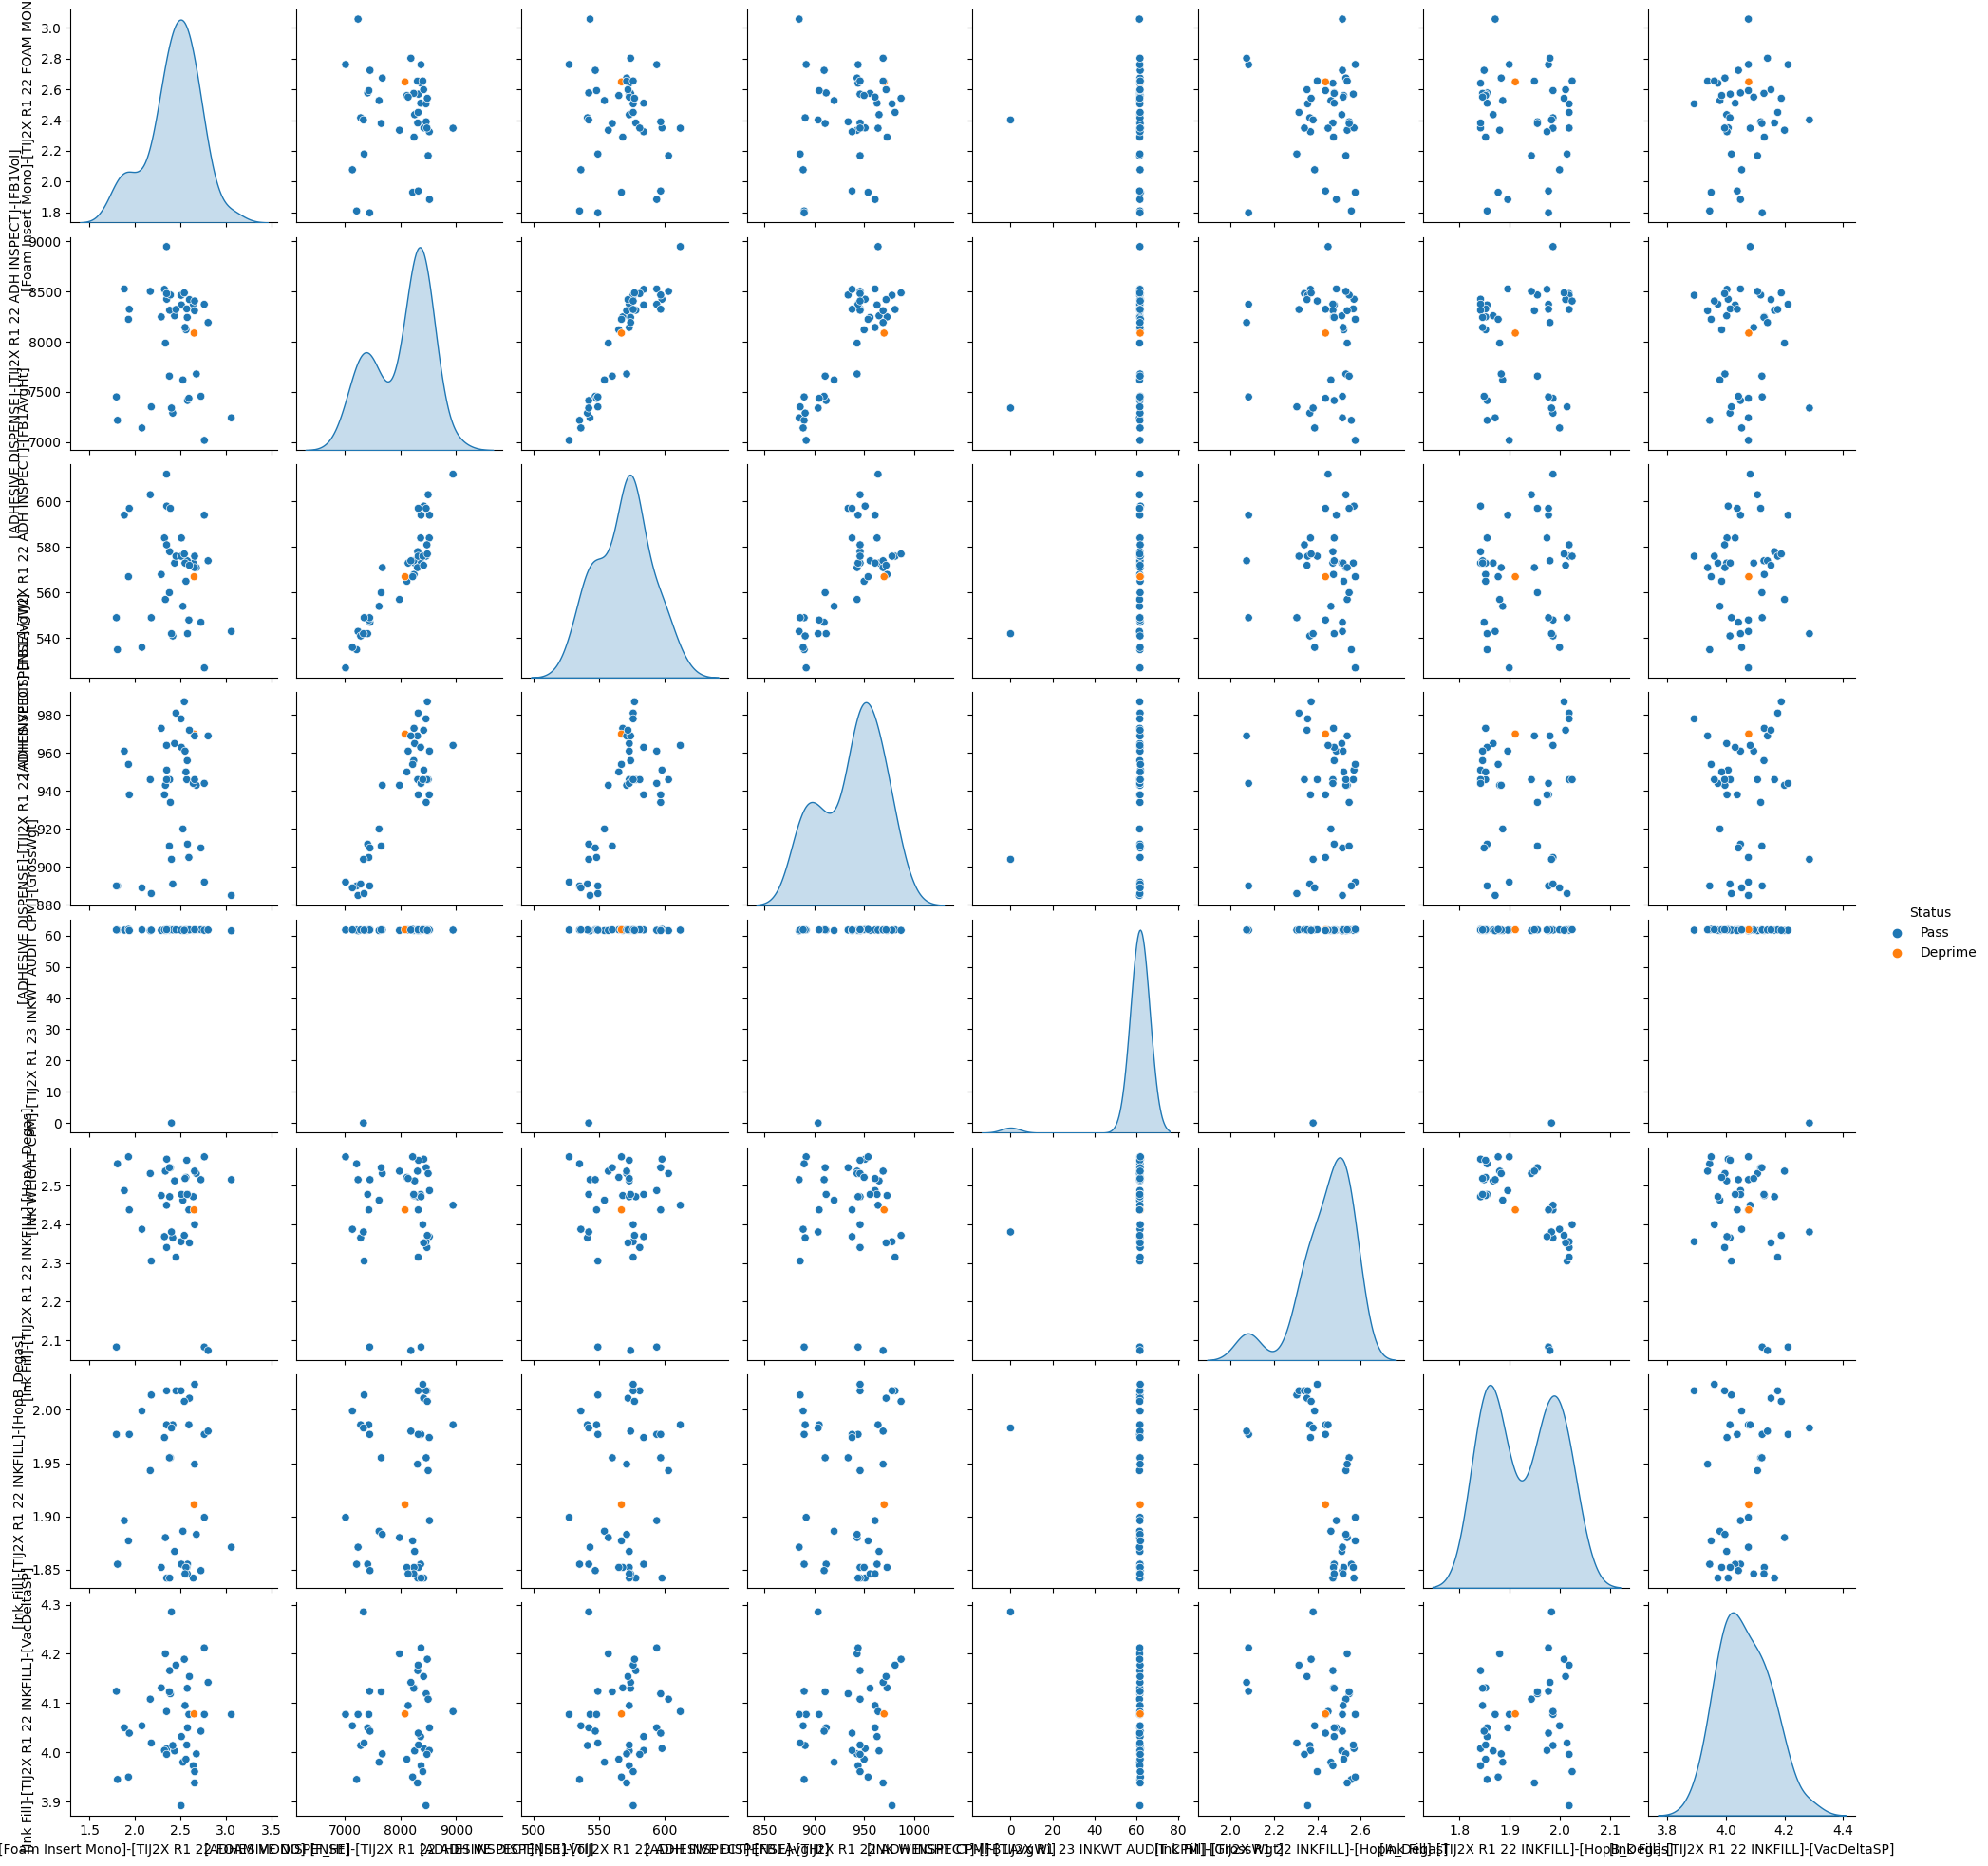

In [76]:
#pairplot
sns.pairplot(df_featured_reset, hue='Status')
plt.show()

# Bayesian Network Modelling 

In [60]:
from pgmpy.estimators import HillClimbSearch, MaximumLikelihoodEstimator, BicScore
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD

from feature_engine import discretisation as dsc

import networkx as nx
import pylab as plt
import time

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [61]:
col_list = []
for col in df_featured_reset.columns:
    print(col, ": ", len(df_featured_reset[col].unique()))
    if(len(df_featured_reset[col].unique()) > 5):
        col_list.append(col)

[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht] :  42
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1Vol] :  42
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgHt] :  29
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgWi] :  32
[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt] :  29
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas] :  31
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas] :  28
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP] :  39
Status :  2


In [63]:
num_bins = 3
disc = dsc.EqualFrequencyDiscretiser(q=num_bins, variables=col_list)
df_binned = disc.fit(df_featured_reset[col_list])
equalfrequency_discretizer_dict = disc.binner_dict_
bin_df_equalfrequency = pd.DataFrame.from_dict(equalfrequency_discretizer_dict, orient = 'index')  

In [64]:
bin_df_equalfrequency

,0,1,2,3
[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht],-inf,2.368333,2.570667,inf
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1Vol],-inf,7882.666667,8339.000000,inf
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgHt],-inf,563.333333,576.000000,inf
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgWi],-inf,936.666667,954.666667,inf
[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt],-inf,61.756667,61.833333,inf
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas],-inf,2.424333,2.515000,inf
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas],-inf,1.875000,1.977000,inf
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP],-inf,4.014667,4.099333,inf


In [65]:
df_featured_reset.describe()

,[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1Vol],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgWi],[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]
count,42.00000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,2.43100,8026.428571,568.523810,938.642857,60.319286,2.437595,1.926095,4.064190
std,0.27852,498.093592,20.241515,30.123179,9.535049,0.125852,0.066142,0.085377
min,1.79600,7018.000000,527.000000,885.000000,0.000000,2.074000,1.842000,3.892000
25%,2.33725,7496.750000,550.250000,911.250000,61.717500,2.373250,1.855000,4.003250
50%,2.47800,8243.500000,572.500000,946.000000,61.795000,2.472500,1.927000,4.052000
75%,2.59650,8396.250000,577.750000,962.500000,61.850000,2.528500,1.985250,4.123750
max,3.05800,8945.000000,612.000000,987.000000,62.040000,2.574000,2.024000,4.285000


# Discretization  

In [ ]:
a=[ '1.796to2.368333', '2.368333to2.570667','2.570667to3.058']
b=['701to784.333333','784.333333to805','805to895']
c=['1235to1313','1313to1378.333333','1378.333333to1561']
d=['452to488.666667','488.666667to505.333333','505.333333to527']
e=['725to764','764to784','784to823']
f=['3.835to4.041333','4.041333to4.114667','4.114667to4.305']
g=['28.857to28.933333','28.933333to29','29to29.129']
h=['0to61.756667','61.756667to61.833333','61.833333to62.04']
i=['24.859to24.951667','24.951667to25.009333','25.009333to25.114']
j=['28.96to29.01','29.01to29.051667','29.051667to29.187']
k=['2.074to2.424333','2.424333to2.515','2.515to2.574']
l=['1.842to1.875','1.875to1.977','1.977to2.024']
m=['24.766to24.869','24.869to24.926','24.926to25.079']
n=['28.857to28.933333','28.933333to29','29to29.129']
o=['3.892to4.014667','4.014667to4.099333','4.099333to4.285']

In [57]:
df_featured_reset['[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht]']=pd.cut(df_featured_reset['[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht]'], 3, labels = a)
df_featured_reset['[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxHt]']=pd.cut(df_featured_reset['[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxHt]'], 3, labels = b)
df_featured_reset['[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxWi]']=pd.cut(df_featured_reset['[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxWi]'], 3, labels = c)
df_featured_reset['[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinHt]']=pd.cut(df_featured_reset['[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinHt]'], 3, labels = d)
df_featured_reset['[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinWi]']=pd.cut(df_featured_reset['[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinWi]'], 3, labels = e)
df_featured_reset['[INK FILL]-[TIJ2X R1 22 INKFILL]-[InjDelta]']=pd.cut(df_featured_reset['[INK FILL]-[TIJ2X R1 22 INKFILL]-[InjDelta]'], 3, labels = f)
df_featured_reset['[INK FILL]-[TIJ2X R1 22 INKFILL]-[InjNose]']=pd.cut(df_featured_reset['[INK FILL]-[TIJ2X R1 22 INKFILL]-[InjNose]'], 3, labels = g)
df_featured_reset['[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt]']=pd.cut(df_featured_reset['[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt]'], 3, labels = h)
df_featured_reset['[Ink Fill]-[TIJ2X R1 22 INKFILL]-[EdBodyVac]']=pd.cut(df_featured_reset['[Ink Fill]-[TIJ2X R1 22 INKFILL]-[EdBodyVac]'], 3, labels = i)
df_featured_reset['[Ink Fill]-[TIJ2X R1 22 INKFILL]-[EdNoseVac]']=pd.cut(df_featured_reset['[Ink Fill]-[TIJ2X R1 22 INKFILL]-[EdNoseVac]'], 3, labels = j)
df_featured_reset['[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas]']=pd.cut(df_featured_reset['[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas]'], 3, labels = k)
df_featured_reset['[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]']=pd.cut(df_featured_reset['[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]'], 3, labels = l)
df_featured_reset['[Ink Fill]-[TIJ2X R1 22 INKFILL]-[StBodyVac]']=pd.cut(df_featured_reset['[Ink Fill]-[TIJ2X R1 22 INKFILL]-[StBodyVac]'], 3, labels = m)
df_featured_reset['[Ink Fill]-[TIJ2X R1 22 INKFILL]-[StNoseVac]']=pd.cut(df_featured_reset['[Ink Fill]-[TIJ2X R1 22 INKFILL]-[StNoseVac]'], 3, labels = n)
df_featured_reset['[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]']=pd.cut(df_featured_reset['[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]'], 3, labels = o)


In [58]:
df_featured_reset 


,[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxWi],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinWi],[IHA ADHESIVE CURE]-[TIJ2X R1 22 IHA CURE PALLETS]-[Heat_bank],[INK FILL]-[TIJ2X R1 22 INKFILL]-[InjDelta],[INK FILL]-[TIJ2X R1 22 INKFILL]-[InjNose],[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[EdBodyVac],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[EdNoseVac],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[StBodyVac],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[StNoseVac],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP],Status
0,2.368333to2.570667,784.333333to805,1235to1313,452to488.666667,764to784,6.0,3.835to4.041333,28.857to28.933333,61.833333to62.04,25.009333to25.114,29.01to29.051667,2.515to2.574,1.842to1.875,24.926to25.079,28.857to28.933333,3.892to4.014667,Pass
1,2.570667to3.058,701to784.333333,1235to1313,452to488.666667,725to764,3.0,4.114667to4.305,29to29.129,61.833333to62.04,24.951667to25.009333,29.01to29.051667,2.515to2.574,1.842to1.875,24.869to24.926,29to29.129,4.014667to4.099333,Pass
2,1.796to2.368333,805to895,1313to1378.333333,505.333333to527,784to823,2.0,4.041333to4.114667,29to29.129,61.833333to62.04,24.951667to25.009333,29.01to29.051667,2.515to2.574,1.842to1.875,24.926to25.079,29to29.129,4.014667to4.099333,Pass
3,2.368333to2.570667,784.333333to805,1313to1378.333333,488.666667to505.333333,784to823,2.0,3.835to4.041333,28.857to28.933333,61.833333to62.04,25.009333to25.114,29.01to29.051667,2.515to2.574,1.842to1.875,24.869to24.926,28.857to28.933333,3.892to4.014667,Pass
4,2.368333to2.570667,784.333333to805,1235to1313,488.666667to505.333333,764to784,2.0,4.114667to4.305,29to29.129,61.833333to62.04,24.951667to25.009333,29.051667to29.187,2.515to2.574,1.842to1.875,24.766to24.869,29to29.129,4.099333to4.285,Pass
5,2.368333to2.570667,784.333333to805,1235to1313,452to488.666667,764to784,1.0,4.041333to4.114667,28.933333to29,61.833333to62.04,24.951667to25.009333,28.96to29.01,2.515to2.574,1.842to1.875,24.869to24.926,28.933333to29,4.014667to4.099333,Pass
6,2.570667to3.058,784.333333to805,1235to1313,452to488.666667,725to764,6.0,4.041333to4.114667,28.857to28.933333,61.833333to62.04,24.859to24.951667,28.96to29.01,2.515to2.574,1.842to1.875,24.766to24.869,28.857to28.933333,4.014667to4.099333,Pass
7,2.368333to2.570667,784.333333to805,1378.333333to1561,505.333333to527,764to784,2.0,4.041333to4.114667,28.857to28.933333,61.833333to62.04,24.951667to25.009333,28.96to29.01,2.515to2.574,1.842to1.875,24.869to24.926,28.857to28.933333,4.014667to4.099333,Pass
8,2.570667to3.058,784.333333to805,1313to1378.333333,488.666667to505.333333,725to764,1.0,4.041333to4.114667,28.857to28.933333,61.833333to62.04,24.951667to25.009333,28.96to29.01,2.515to2.574,1.842to1.875,24.869to24.926,28.857to28.933333,3.892to4.014667,Pass
9,2.570667to3.058,784.333333to805,1235to1313,452to488.666667,764to784,4.0,4.041333to4.114667,28.933333to29,61.833333to62.04,24.951667to25.009333,28.96to29.01,2.515to2.574,1.842to1.875,24.869to24.926,28.933333to29,4.014667to4.099333,Pass


In [59]:
df_train = df_featured_reset [:30]
df_test = df_featured_reset [30:]

In [82]:
hc = HillClimbSearch(df_train)
best_model = hc.estimate(scoring_method=BicScore(df_train))  # Specify the scoring method here

# Add the target variable to the model
target_variable = "Status"  # Replace with the actual name of your target variable
edges = list(best_model.edges())
edges.append((["[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]", target_variable]))
edges.append((["[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinWi]", target_variable]))
edges.append((["[Ink Fill]-[TIJ2X R1 22 INKFILL]-[EdBodyVac]", target_variable]))

model = BayesianModel(edges)

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [61]:
print("Nodes in the graph:", model.nodes())
print("Edges in the graph:", model.edges())

Nodes in the graph: ['[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxHt]', '[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinHt]', '[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxWi]', '[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinWi]', '[INK FILL]-[TIJ2X R1 22 INKFILL]-[InjDelta]', '[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]', '[Ink Fill]-[TIJ2X R1 22 INKFILL]-[StNoseVac]', '[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas]', '[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]', '[Ink Fill]-[TIJ2X R1 22 INKFILL]-[StBodyVac]', '[Ink Fill]-[TIJ2X R1 22 INKFILL]-[EdBodyVac]', '[INK FILL]-[TIJ2X R1 22 INKFILL]-[InjNose]', 'Status']
Edges in the graph: [('[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxHt]', '[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinHt]'), ('[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinHt]', '[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxWi]'), ('[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinHt]', '[ADHESIVE DISPENSE

In [62]:
nx_graph = nx.DiGraph()
nx_graph.add_edges_from(edges)

<Figure size 1200x800 with 0 Axes>

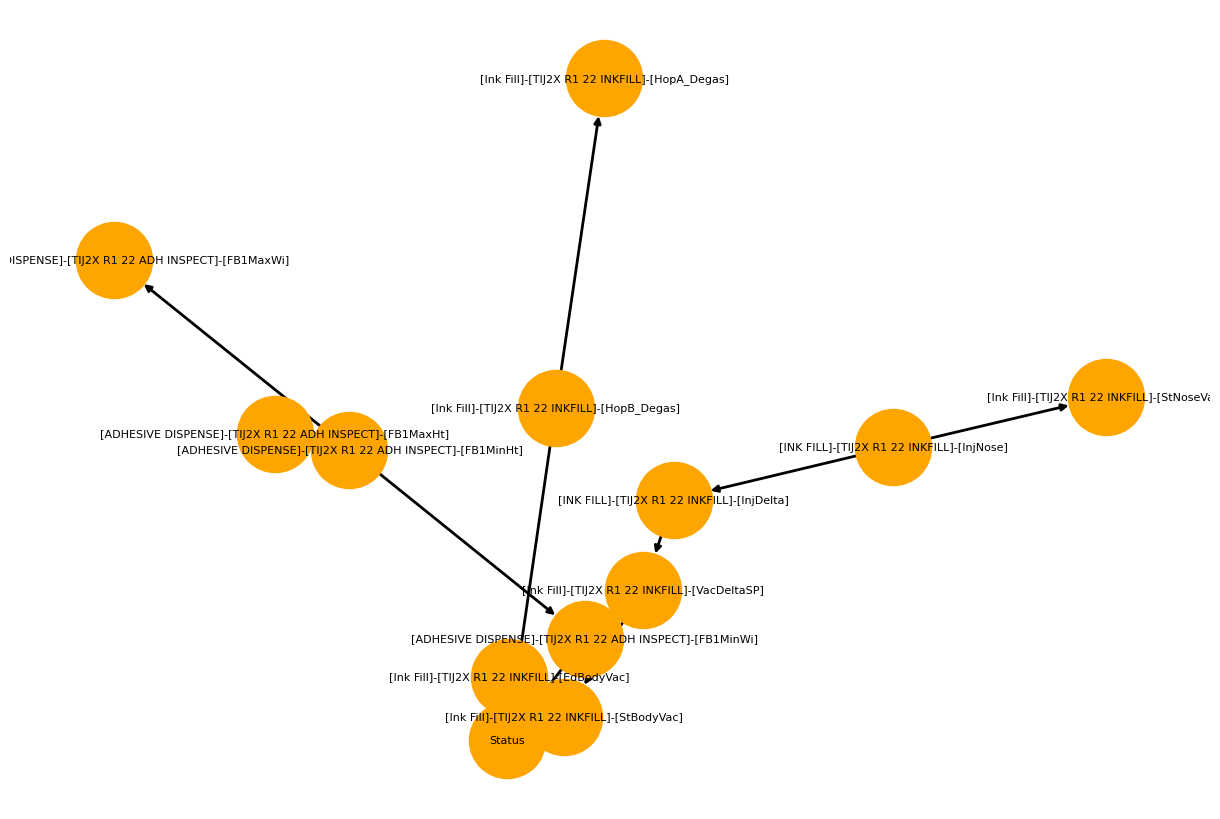

In [101]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph, pos=pos, with_labels=True, node_size=3000, node_color="orange", width=2, font_size=8)
plt.show()

In [63]:
model.get_children(target_variable)

[]

In [64]:
model.get_parents(target_variable)

['[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]',
 '[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinWi]',
 '[Ink Fill]-[TIJ2X R1 22 INKFILL]-[EdBodyVac]']

Inference

In [107]:
# Fitting the data to the model using Maximum Likelihood Estimator
model.fit(df_train, estimator=MaximumLikelihoodEstimator)

# Doing exact inference using Variable Elimination
infer = VariableElimination(model)

In [112]:
# Filter the data to include only rows where Status is 'Deprime'
deprime_data = df_train[df_train['Status'] == 'Deprime']

# Get the list of all variables in your model except the target variable
all_variables_except_target = [var for var in model.nodes if var != 'Status']

# Perform MAP inference for each variable against 'Status' = 'Deprime'
map_values = {}
for variable in all_variables_except_target:
    map_value = infer.map_query(variables=[variable], evidence={'Status': 'Deprime'})
    map_values[variable] = map_value[variable]

# Print the MAP values for each variable against 'Status' = 'Deprime'
# Maximum a posteriori (MAP) learning selects a single most likely hypothesis given the data. 
# The hypothesis prior is still used and the method is often more tractable than full Bayesian learning.
for variable, value in map_values.items():
    print(f"MAP value for {variable}: {value}")


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

MAP value for [ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxHt]: 784.333333to805
MAP value for [ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinHt]: 505.333333to527
MAP value for [ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxWi]: 1313to1378.333333
MAP value for [ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinWi]: 784to823
MAP value for [INK FILL]-[TIJ2X R1 22 INKFILL]-[InjDelta]: 4.041333to4.114667
MAP value for [Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]: 4.014667to4.099333
MAP value for [Ink Fill]-[TIJ2X R1 22 INKFILL]-[StNoseVac]: 28.933333to29
MAP value for [Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas]: 2.515to2.574
MAP value for [Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]: 1.977to2.024
MAP value for [Ink Fill]-[TIJ2X R1 22 INKFILL]-[StBodyVac]: 24.869to24.926
MAP value for [Ink Fill]-[TIJ2X R1 22 INKFILL]-[EdBodyVac]: 24.951667to25.009333
MAP value for [INK FILL]-[TIJ2X R1 22 INKFILL]-[InjNose]: 28.933333to29


In [108]:
# Get the list of all variables in your model except the target variable
all_variables_except_target = [var for var in model.nodes if var != target_variable]

# Perform MAP inference for each variable
map_values = {}
for variable in all_variables_except_target:
    map_value = infer.map_query(variables=[variable])
    map_values[variable] = map_value[variable]

# Print the MAP values for each variable
for variable, value in map_values.items():
    print(f"MAP value for {variable}: {value}")


0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

MAP value for [ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxHt]: 784.333333to805
MAP value for [ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinHt]: 505.333333to527
MAP value for [ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxWi]: 1235to1313
MAP value for [ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinWi]: 764to784
MAP value for [INK FILL]-[TIJ2X R1 22 INKFILL]-[InjDelta]: 4.041333to4.114667
MAP value for [Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]: 4.014667to4.099333
MAP value for [Ink Fill]-[TIJ2X R1 22 INKFILL]-[StNoseVac]: 28.933333to29
MAP value for [Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas]: 2.515to2.574
MAP value for [Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]: 1.842to1.875
MAP value for [Ink Fill]-[TIJ2X R1 22 INKFILL]-[StBodyVac]: 24.869to24.926
MAP value for [Ink Fill]-[TIJ2X R1 22 INKFILL]-[EdBodyVac]: 24.951667to25.009333
MAP value for [INK FILL]-[TIJ2X R1 22 INKFILL]-[InjNose]: 28.933333to29


In [162]:
joint_distribution = infer.query(variables=[target_variable], 
                                 joint=True)

In [163]:
print(joint_distribution)

+-----------------+---------------+
| Status          |   phi(Status) |
+=================+===============+
| Status(Deprime) |        0.1144 |
+-----------------+---------------+
| Status(Pass)    |        0.8856 |
+-----------------+---------------+


In [153]:
# Get the list of all variables in your model except the target variable
all_variables_except_target = [var for var in model.nodes if var != 'Status']

# Perform joint distribution inference for each variable against 'Status' = 'Deprime'
joint_distributions = {}
for variable in all_variables_except_target:
    query_result = infer.query(variables=[variable], evidence={'Status': 'Deprime'})
    joint_distributions[variable] = query_result.values  # Assuming query_result is an object with a 'values' attribute

# Print the joint distributions for each variable against 'Status' = 'Deprime'
for variable, distribution in joint_distributions.items():
    print(f"Joint distribution for {variable} given 'Status' = 'Deprime': {distribution}")


Joint distribution for [ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxHt] given 'Status' = 'Deprime': [0.20230805 0.56310719 0.23458476]
Joint distribution for [ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinHt] given 'Status' = 'Deprime': [0.25453368 0.31638601 0.42908031]
Joint distribution for [ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxWi] given 'Status' = 'Deprime': [0.41110383 0.54988887 0.0390073 ]
Joint distribution for [ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinWi] given 'Status' = 'Deprime': [0.13989637 0.39086788 0.46923575]
Joint distribution for [INK FILL]-[TIJ2X R1 22 INKFILL]-[InjDelta] given 'Status' = 'Deprime': [0.15662781 0.69690468 0.14646751]
Joint distribution for [Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP] given 'Status' = 'Deprime': [0.31325561 0.53613205 0.15061234]
Joint distribution for [Ink Fill]-[TIJ2X R1 22 INKFILL]-[StNoseVac] given 'Status' = 'Deprime': [0.42211531 0.471465   0.10641969]
Joint distribution for [Ink Fill]-[

In [88]:
from pgmpy.estimators import BayesianEstimator
from IPython.core.display import display, HTML

# disable text wrapping in output cell
display(HTML("<style>div.output_area pre {white-space: pre;}</style>"))

model.cpds = []
model.fit(data=df_train,
          estimator=BayesianEstimator,
          prior_type="BDeu",
          equivalent_sample_size=10,
          complete_samples_only=False)

print(f'Check model: {model.check_model()}\n')
for cpd in model.get_cpds():
    print(f'CPT of {cpd.variable}:')
    print(cpd, '\n')

Check model: True

CPT of [ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxHt]:
+---------------------------------------------------------------------------+----------+
| [ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxHt](701to784.333333) | 0.233333 |
+---------------------------------------------------------------------------+----------+
| [ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxHt](784.333333to805) | 0.533333 |
+---------------------------------------------------------------------------+----------+
| [ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxHt](805to895)        | 0.233333 |
+---------------------------------------------------------------------------+----------+ 

CPT of [ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinHt]:
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+ 

CPT of [ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxWi]:
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+ 

CPT of [ADHES

Network definition

In [64]:
#edges_1 = [
    ("[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI XY/SWAGE]-[PC_INSP_U]", "Status"),
    ("[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI XY/SWAGE]-[PC_INSP_X]", "Status"),
    ("[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI XY/SWAGE]-[PC_INSP_Y]", "Status"),
    ("[IHA ADHESIVE CURE]-[TIJ2X R1 22 IHA CURE PALLETS]-[Heat_bank]", "Status"),
    ("[INK FILL]-[TIJ2X R1 22 INKFILL]-[InjDelta]", "Status"),
    ("[INK FILL]-[TIJ2X R1 22 INKFILL]-[InjNose]", "Status"),
    ("[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt]", "Status"),
    ("[Ink Fill]-[TIJ2X R1 22 INKFILL]-[EdBodyVac]", "Status"),
    ("[Ink Fill]-[TIJ2X R1 22 INKFILL]-[EdNoseVac]", "Status"),
    ("[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas]", "Status"),
    ("[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]", "Status"),
    ("[Ink Fill]-[TIJ2X R1 22 INKFILL]-[StBodyVac]", "Status"),
    ("[Ink Fill]-[TIJ2X R1 22 INKFILL]-[StNoseVac]", "Status"),
    ("[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]", "Status"),
    ("[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht]", "Status"),
    ("[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxHt]", "Status"),
    ("[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxWi]", "Status"),
    ("[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinHt]", "Status"),
    ("[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinWi]", "Status"),
    ("[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMThX]", "Status"),
    ("[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMThYN]", "Status"),
    ("[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMThYS]", "Status")
]


In [44]:
edges_1 = [
    ("[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas]","[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]"),
    ("[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]","[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]"),
    ("[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]","[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt]"),
    ("[INK FILL]-[TIJ2X R1 22 INKFILL]-[InjNose]","[INK FILL]-[TIJ2X R1 22 INKFILL]-[InjDelta]"),
    ("[INK FILL]-[TIJ2X R1 22 INKFILL]-[InjDelta]","[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]"),
    ("[Ink Fill]-[TIJ2X R1 22 INKFILL]-[StBodyVac]","[Ink Fill]-[TIJ2X R1 22 INKFILL]-[EdBodyVac]"),
    ("[Ink Fill]-[TIJ2X R1 22 INKFILL]-[StNoseVac]","[Ink Fill]-[TIJ2X R1 22 INKFILL]-[EdNoseVac]"),
    ("[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt]", "Status"),
    ("[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]", "Status"),
    ("[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht]", "[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]"),
    ("[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht]", "[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt]"),
    ("[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxHt]", "[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinHt]"),
    ("[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxWi]", "[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinWi]"),
    ("[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinHt]", "[IHA ADHESIVE CURE]-[TIJ2X R1 22 IHA CURE PALLETS]-[Heat_bank]"),
    ("[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinWi]", "[IHA ADHESIVE CURE]-[TIJ2X R1 22 IHA CURE PALLETS]-[Heat_bank]"),
    ("[IHA ADHESIVE CURE]-[TIJ2X R1 22 IHA CURE PALLETS]-[Heat_bank]", "Status"),
    ("[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinHt]", "[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMThX]"),
    ("[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinHt]", "[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMThYN]"),
    ("[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinWi]", "[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMThYS]"),
    ("[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMThX]", "Status"),
    ("[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMThYN]", "Status"),
    ("[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMThYS]", "Status")
]

In [ ]:
  "[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht]",
    "[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxHt]",
    "[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MaxWi]",
    "[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinHt]",
    "[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1MinWi]",
    "[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMThX]",
    "[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMThYN]",
    "[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMThYS]",
    "[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI XY/SWAGE]-[PC_INSP_U]",
    "[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI XY/SWAGE]-[PC_INSP_X]",
    "[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI XY/SWAGE]-[PC_INSP_Y]",
    "[IHA ADHESIVE CURE]-[TIJ2X R1 22 IHA CURE PALLETS]-[Heat_bank]",
    "[INK FILL]-[TIJ2X R1 22 INKFILL]-[InjDelta]",
    "[INK FILL]-[TIJ2X R1 22 INKFILL]-[InjNose]",
    "[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt]",
    "[Ink Fill]-[TIJ2X R1 22 INKFILL]-[EdBodyVac]",
    "[Ink Fill]-[TIJ2X R1 22 INKFILL]-[EdNoseVac]",
    "[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas]",
    "[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]",
    "[Ink Fill]-[TIJ2X R1 22 INKFILL]-[StBodyVac]",
    "[Ink Fill]-[TIJ2X R1 22 INKFILL]-[StNoseVac]",
    "[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]",
    "Status"